In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# NODE ORGANISATION

In [44]:
activations=np.load('activation.npy')

In [45]:
np.shape(activations)

(14, 14)

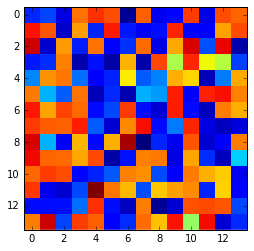

In [46]:
plt.imshow(activations, interpolation='none')

# ACTIVATION TRANSFORMATION

1. starting from high pass filter (https://stackoverflow.com/questions/6094957/high-pass-filter-for-image-processing-in-python-by-using-scipy-numpy)

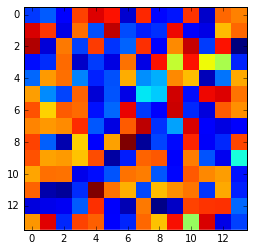

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage

#def plot(data, title):
#    plot.i += 1
#    plt.subplot(2,2,plot.i)
#    plt.imshow(data)
#    plt.gray()
#    plt.title(title)
#plot.i = 0

# A very simple and very narrow highpass filter
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

highpass_3x3 = ndimage.convolve(activations, kernel)

# Another way of making a highpass filter is to simply subtract a lowpass
# filtered image from the original. Here, we'll use a simple gaussian filter
# to "blur" (i.e. a lowpass filter) the original.
lowpass = ndimage.gaussian_filter(activations, 3)
gauss_highpass = activations - lowpass
#plt(gauss_highpass, r'Gaussian Highpass, $\sigma = 3 pixels$')
#plt.show()

plt.imshow(gauss_highpass, interpolation='none')

# Target Pattern


# Regularisation
Frobenius norm

In [22]:
from scipy.linalg import norm

norm(gauss_highpass)

1.7954046

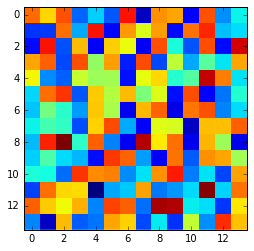

In [64]:
K = np.array([[-1, -1, -1],
            [-1,  8, -1],
            [-1, -1, -1]],  dtype=np.float32)
# as tensorflow constants with correct shapes
x = tf.constant(activations.reshape(1, activations.shape[0], activations.shape[1], 1))

w = tf.constant(K.reshape(K.shape[0],K.shape[1], 1, 1))


with tf.Session() as sess:
    # get low/high pass ops
    lowpass = tf.nn.conv2d(x, w, strides=[1, 1, 1, 1], padding='SAME')
    highpass = x-lowpass

    # get high pass image
    l = sess.run(highpass)
    l = l.reshape(14,14)

    plt.imshow(l, interpolation='none')
    l=sess.run(x)

In [37]:
print np.shape(l)

(1, 14, 14, 1)
